# World Happiness Report 2023 - Exploratory Data Analysis

The World Happiness Report is an annual publication that ranks countries based on their happiness levels, as measured by a range of economic, social, and political indicators. The report is produced by the United Nations Sustainable Development Solutions Network. It is designed to provide policymakers, academics, and the general public with insights into the factors that contribute to happiness and well-being around the world.

In this project, I'll be using World Happiness Report 2023 data to visually analyze what factors make people in a country happy. The dataset can be found [here](https://www.kaggle.com/datasets/atom1991/world-happiness-report-2023). 

## Setting up
We will start by importing the necessary libraries and setting style for our visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## The World Happiness Report Dataset
Let's have a look at the dataset's head and tail to get an idea of what it's like.

In [2]:
df = pd.read_csv('data/WHR2023.csv')
print(f"Shape of the data: {df.shape}")

display(df.head())
df.tail()

Shape of the data: (137, 21)


,Country name,iso alpha,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,AFG,South Asia,1.859,0.033,1.923,1.795,7.324,0.341,54.712,...,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,Albania,ALB,Central and Eastern Europe,5.277,0.066,5.406,5.148,9.567,0.718,69.150,...,-0.007,0.878,1.778,1.449,0.951,0.480,0.549,0.133,0.037,1.678
2,Algeria,DZA,Middle East and North Africa,5.329,0.062,5.451,5.207,9.300,0.855,66.549,...,-0.117,0.717,1.778,1.353,1.298,0.409,0.252,0.073,0.152,1.791
3,Argentina,ARG,Latin America and Caribbean,6.024,0.063,6.147,5.900,9.959,0.891,67.200,...,-0.089,0.814,1.778,1.590,1.388,0.427,0.587,0.088,0.082,1.861
4,Armenia,ARM,Commonwealth of Independent States,5.342,0.066,5.470,5.213,9.615,0.790,67.789,...,-0.155,0.705,1.778,1.466,1.134,0.443,0.551,0.053,0.160,1.534


,Country name,iso alpha,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
132,Uzbekistan,UZB,Commonwealth of Independent States,6.014,0.059,6.130,5.899,8.948,0.875,65.301,...,0.230,0.638,1.778,1.227,1.347,0.375,0.740,0.260,0.208,1.856
133,Venezuela,VEN,Latin America and Caribbean,5.211,0.064,5.336,5.085,5.527,0.839,64.050,...,0.128,0.811,1.778,0.000,1.257,0.341,0.369,0.205,0.084,2.955
134,Vietnam,VNM,Southeast Asia,5.763,0.052,5.865,5.662,9.287,0.821,65.502,...,-0.004,0.759,1.778,1.349,1.212,0.381,0.741,0.134,0.122,1.824
135,Zambia,ZMB,Sub-Saharan Africa,3.982,0.094,4.167,3.797,8.074,0.694,55.032,...,0.098,0.818,1.778,0.914,0.890,0.095,0.545,0.189,0.080,1.270
136,Zimbabwe,ZWE,Sub-Saharan Africa,3.204,0.061,3.323,3.084,7.641,0.690,54.050,...,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905


137 countries are included in the survey. Looks like the dataset have a few redundant fields. Let's explore further.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   iso alpha                                   137 non-null    object 
 2   Regional indicator                          137 non-null    object 
 3   Happiness score                             137 non-null    float64
 4   Standard error of ladder score              137 non-null    float64
 5   upperwhisker                                137 non-null    float64
 6   lowerwhisker                                137 non-null    float64
 7   Logged GDP per capita                       137 non-null    float64
 8   Social support                              137 non-null    float64
 9   Healthy life expectancy                     136 non-null    float64
 10  Freedom to mak

Now we will filter the columns that will be used for our analysis. We are dropping "Explained by" columns as they are processed scores, as well as "Ladder score in Dystopia" since it is a constant value. We will also drop Happiness score's statistics as they are not needed for our visualizations.

In [4]:
cols = ['Country name', 'iso alpha', 'Regional indicator', 'Happiness score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
df = df.filter(cols)
df.head()

,Country name,iso alpha,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,AFG,South Asia,1.859,7.324,0.341,54.712,0.382,-0.081,0.847
1,Albania,ALB,Central and Eastern Europe,5.277,9.567,0.718,69.150,0.794,-0.007,0.878
2,Algeria,DZA,Middle East and North Africa,5.329,9.300,0.855,66.549,0.571,-0.117,0.717
3,Argentina,ARG,Latin America and Caribbean,6.024,9.959,0.891,67.200,0.823,-0.089,0.814
4,Armenia,ARM,Commonwealth of Independent States,5.342,9.615,0.790,67.789,0.796,-0.155,0.705


In [5]:
df['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Honduras', 'Hong Kong S.A.R. of China',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Liberia', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi

As seen above, a few countries including Palestine, Hong Kong, and Taiwan have longer names. Let's shorten them for our ease later.

In [6]:
rename_dict = {
    'Taiwan Province of China': 'Taiwan',
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'State of Palestine': 'Palestine'
}
df['Country name'].replace(rename_dict, inplace=True)

Let's have a look at the statistics of our dataset using a custom function that combines `describe` and `info` methods.

In [7]:
def describe(df):    
    # Show information better than describe() and info()
    desc = pd.DataFrame(index=df.columns)
    desc["count"] = df.count()
    desc["null"] = df.isna().sum()
    desc["%null"] = desc["null"] / len(df) * 100
    desc["nunique"] = df.nunique()
    desc["%unique"] = desc["nunique"] / len(df) * 100
    desc["type"] = df.dtypes
    desc = pd.concat([desc, df.describe().T.drop("count", axis=1)], axis=1)

    return desc

describe(df)

,count,null,%null,nunique,%unique,type,mean,std,min,25%,50%,75%,max
Country name,137,0,0.000000,137,100.000000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iso alpha,137,0,0.000000,137,100.000000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Regional indicator,137,0,0.000000,10,7.299270,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness score,137,0,0.000000,134,97.810219,float64,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
Logged GDP per capita,137,0,0.000000,135,98.540146,float64,9.449796,1.207302,5.527,8.5910,9.5670,10.5400,11.660
Social support,137,0,0.000000,116,84.671533,float64,0.799073,0.129222,0.341,0.7220,0.8270,0.8960,0.983
Healthy life expectancy,136,1,0.729927,125,91.240876,float64,64.967632,5.750390,51.530,60.6485,65.8375,69.4125,77.280
Freedom to make life choices,137,0,0.000000,117,85.401460,float64,0.787394,0.112371,0.382,0.7240,0.8010,0.8740,0.961
Generosity,137,0,0.000000,122,89.051095,float64,0.022431,0.141707,-0.254,-0.0740,0.0010,0.1170,0.531
Perceptions of corruption,137,0,0.000000,115,83.941606,float64,0.725401,0.176956,0.146,0.6680,0.7740,0.8460,0.929


In [8]:
df[df.isna().any(axis=1)]

,Country name,iso alpha,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
116,Palestine,PSE,Middle East and North Africa,4.908,8.716,0.859,NaN,0.694,-0.132,0.836


A missing value has been identified in the Healthy life expectancy column for Palestine. I noted this for future reference but decided to leave the value as is, as imputation could bias the information. Leaving this missing value will not affect the analysis.

## Visualizations

### Relationship between factors

Using `sns.pairplot()` to have a look on relationship among variables. There seems to be a strong positive relationship among most of them.

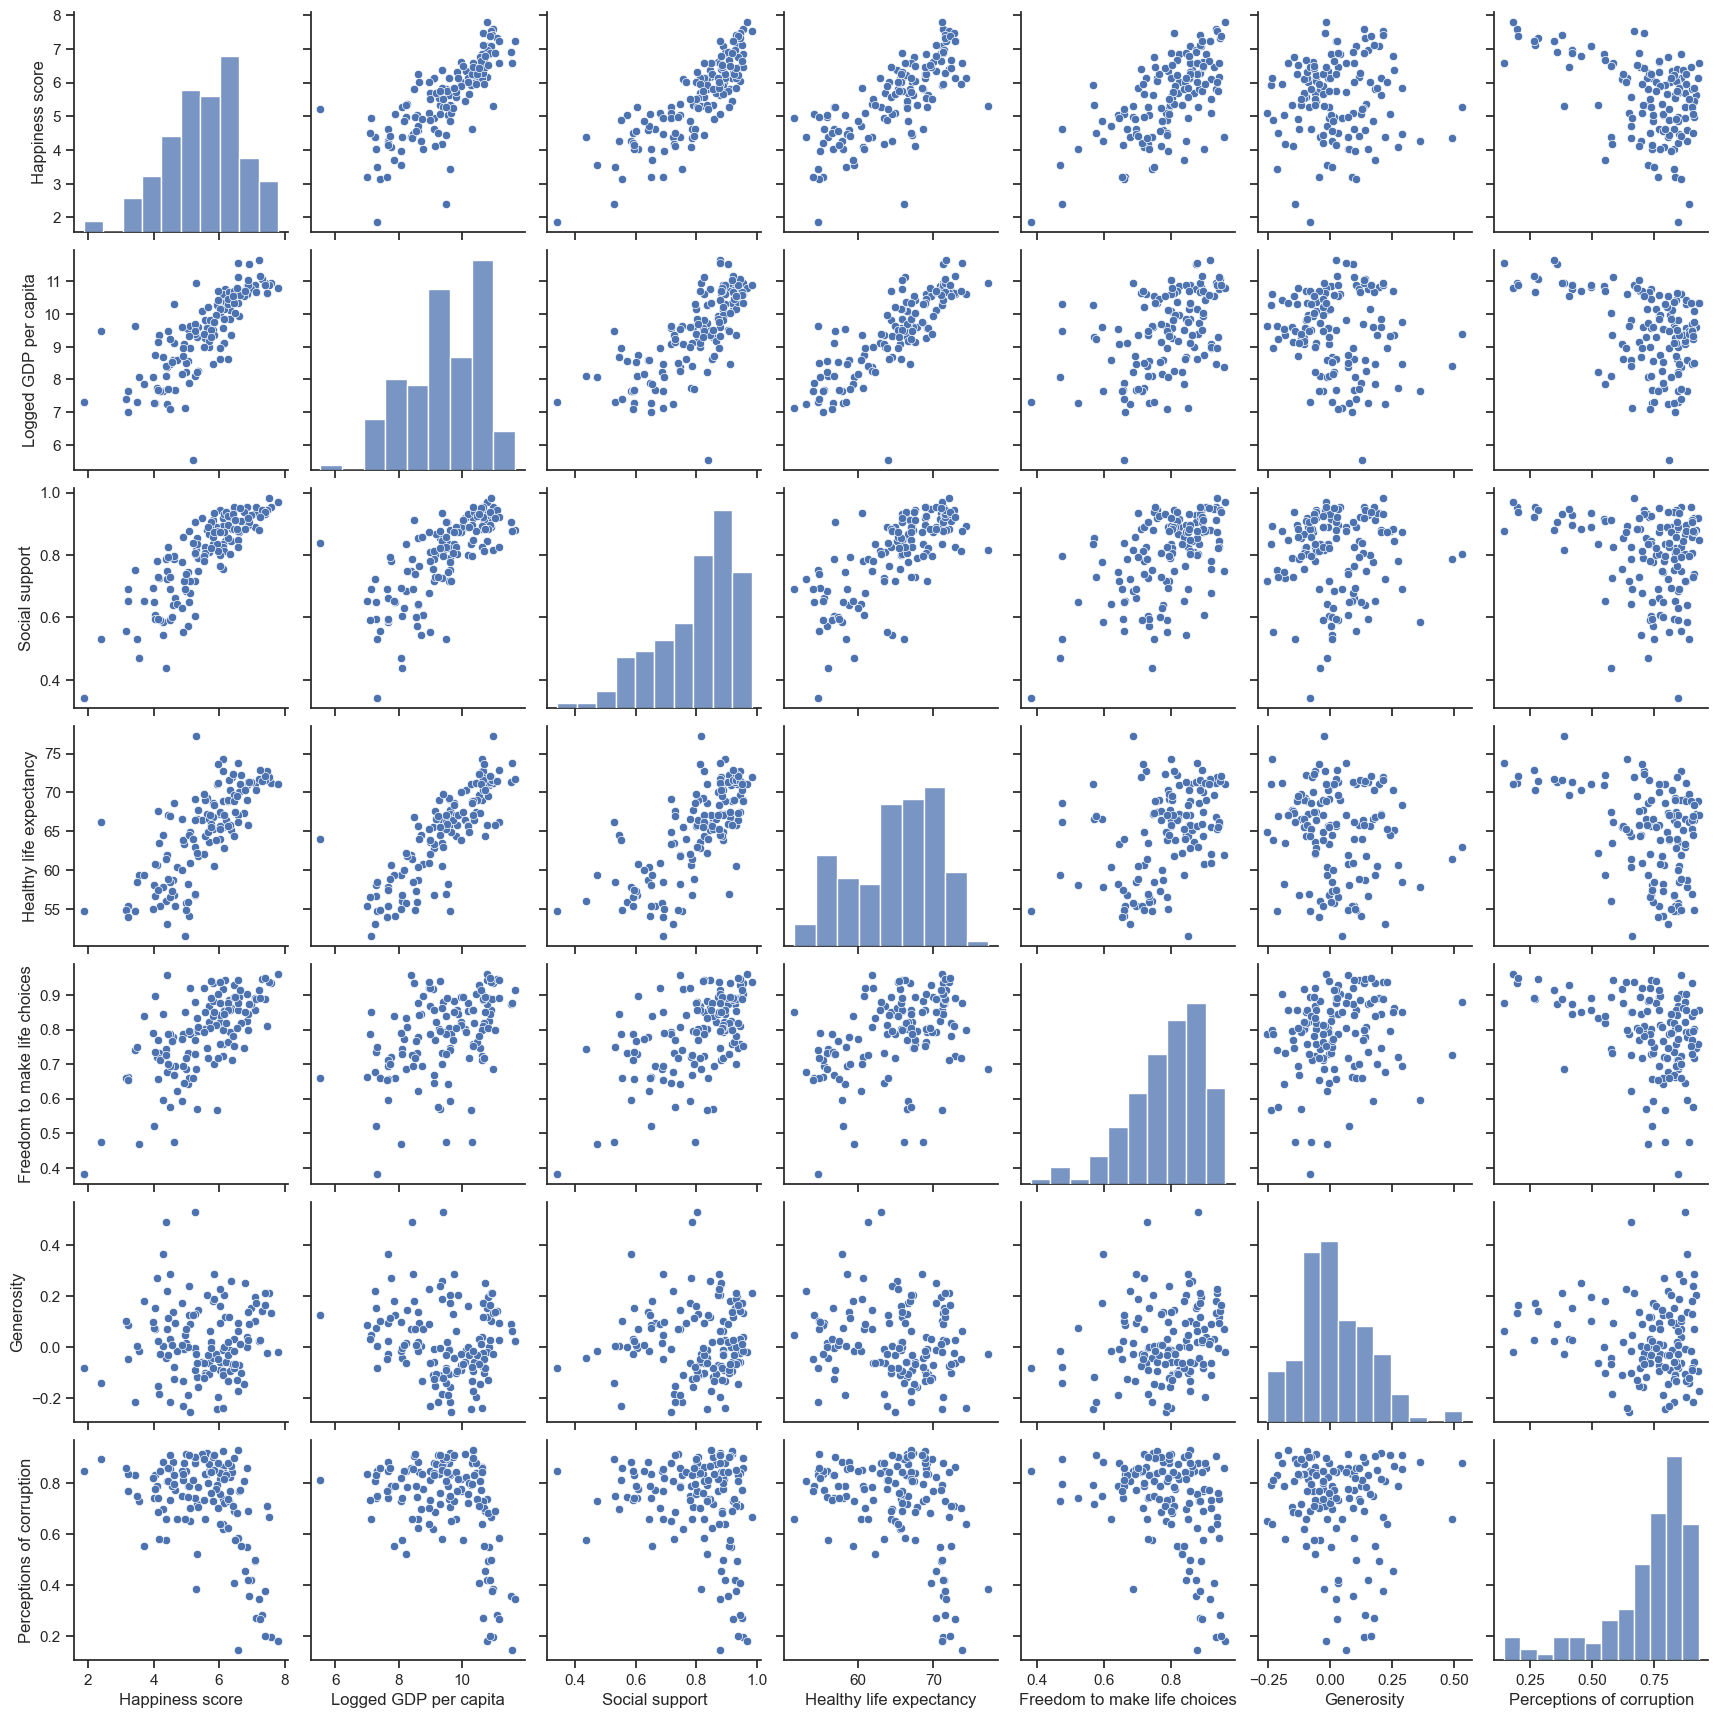

In [9]:
sns.set_theme(style="ticks")
sns.pairplot(df)

Let's plot a heatmap of correlation among variables to have a clearer look on their relationship

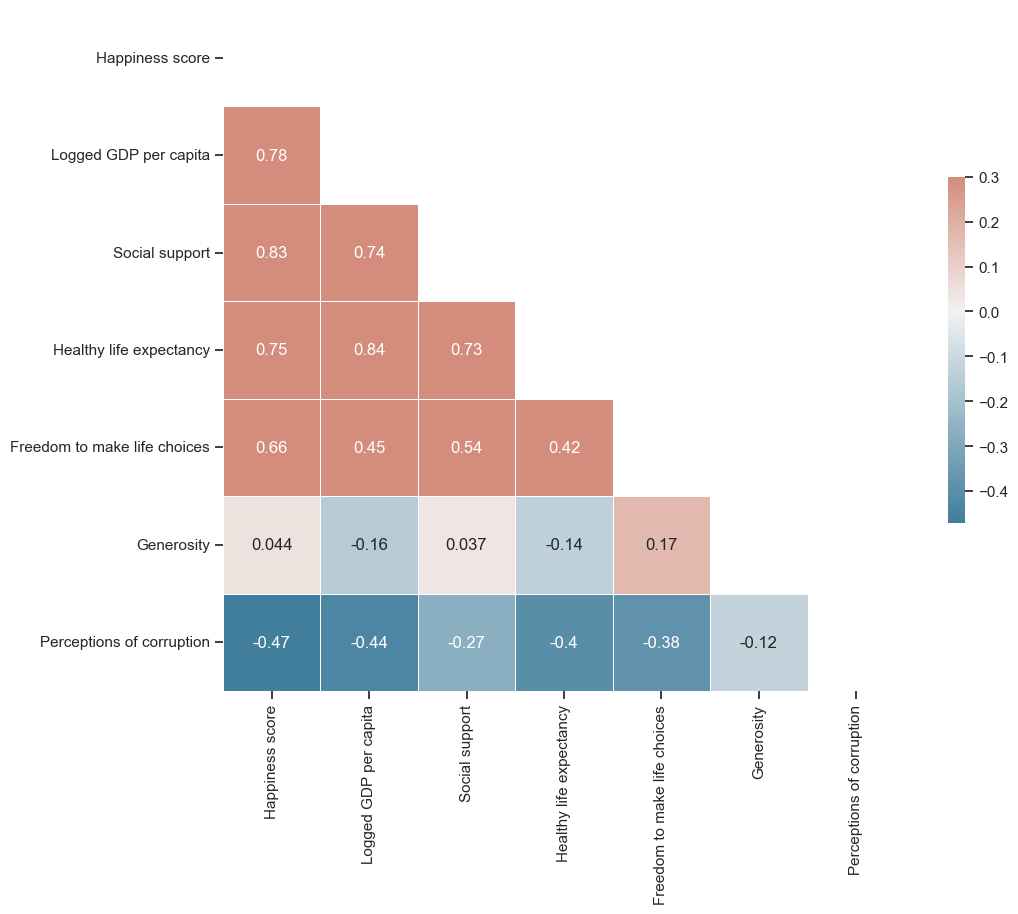

In [10]:
plt.figure(figsize=(11, 9))
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

- The scatter plots and heat map reveals several strong correlations between factors and happiness score. It has been found that countries with higher GDP per capita, healthier life expectancies, greater freedom to make choices, and stronger social support tend to have higher happiness scores. Furthermore, a strong positive correlation has been found between GDP per capita, healthy life expectancy, and social support.
- In addition, a negative correlation has been found between happiness score and perceptions of corruption. This suggests that maintaining high levels of happiness among citizens may be challenging for countries with higher levels of corruption.
- Overall, these findings highlight the importance of economic, social, and political factors in determining happiness levels across countries.

**Top ten happiest countries in the world**

Text(0.5, 0, '')

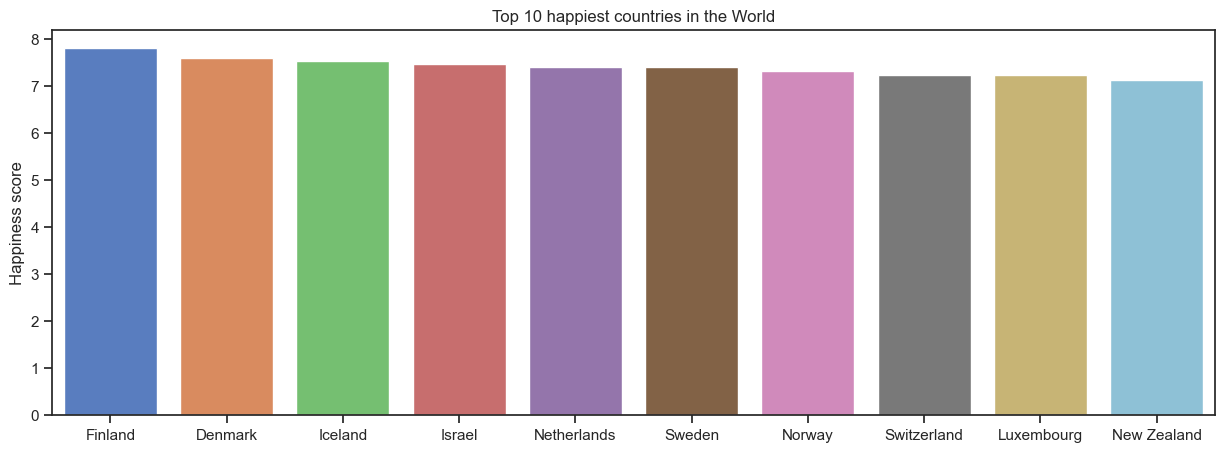

In [11]:
happiest = df[['Country name', 'Happiness score']].sort_values('Happiness score', ascending=False).head(10)

plt.figure(figsize=(15, 5))
plt.title('Top 10 happiest countries in the World')
sns.barplot(happiest, x='Country name', y='Happiness score', palette='muted')
plt.xlabel(None)

Finland, Denmark, Iceland, Israel, Netherlands, Sweden, Norway, Switzerland, Luxembourg, and New Zealand are clearly the top happiest countries in the World. Follow along to explore what makes them the happiest.

**Which countries are best in each factors?**

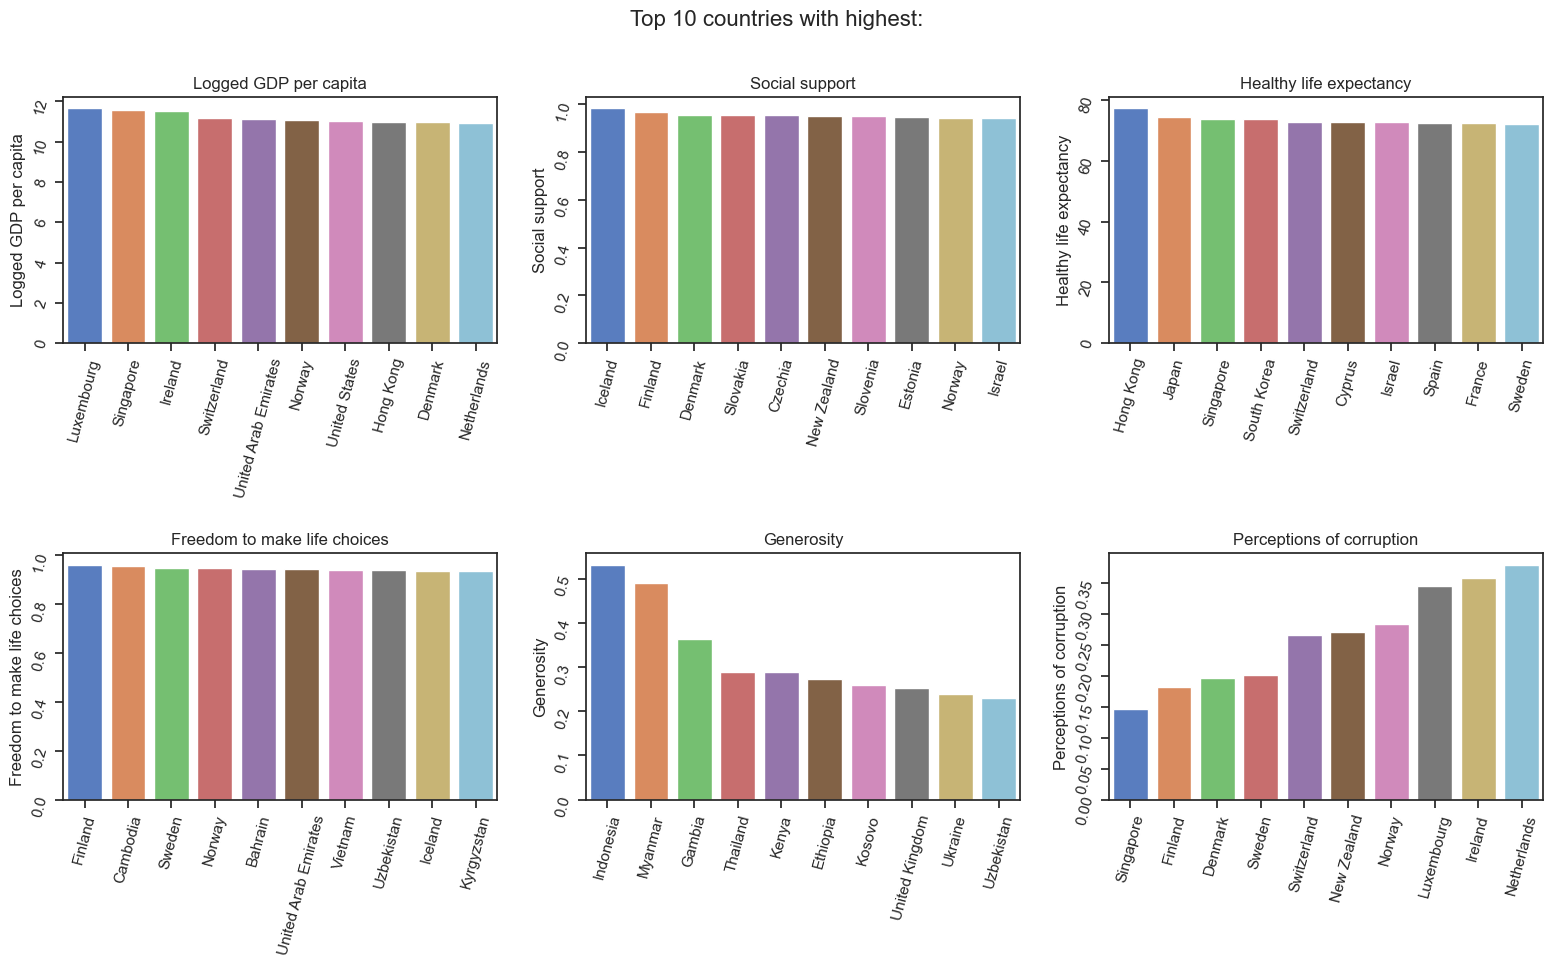

In [12]:
factors = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Top 10 countries with highest:', fontsize=16)

for i, ax in enumerate(fig.axes):
    factor = factors[i]
    ax.set_title(factor)
    ax.tick_params(labelrotation=75)

    negative = (factor == 'Perceptions of corruption')
    highest_factor = df[['Country name', factor]].sort_values(factor, ascending=negative).head(10)
    sns.barplot(highest_factor, x='Country name', y=factor, ax=ax, palette='muted')
    
    ax.set_xlabel(None)

plt.tight_layout(pad=2);

Top 10 countries in all the factors vary. However, the thing to notice is that there are countries among all the factors that were absent in happiest countries plot. Maybe try some other way to identify what makes people in a country happy. But before that, let's have a look on least happy countries.

Text(0.5, 0, '')

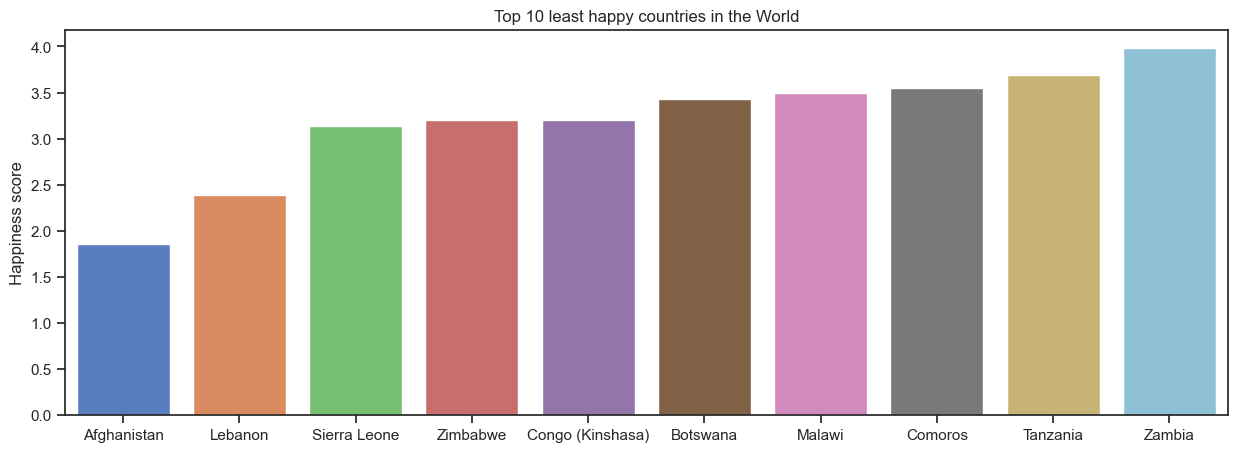

In [13]:
least_happy = df[['Country name', 'Happiness score']].sort_values('Happiness score', ascending=True).head(10)

plt.figure(figsize=(15, 5))
plt.title('Top 10 least happy countries in the World')
sns.barplot(least_happy, x='Country name', y='Happiness score', palette='muted');
plt.xlabel(None)

Afghanistan, Lebanon, Sierra Leone, Zimbabwe, Congo (Kinshasa), Botswana, Malawi, Comoros, Tanzania, and Zambia are the least happy countries.

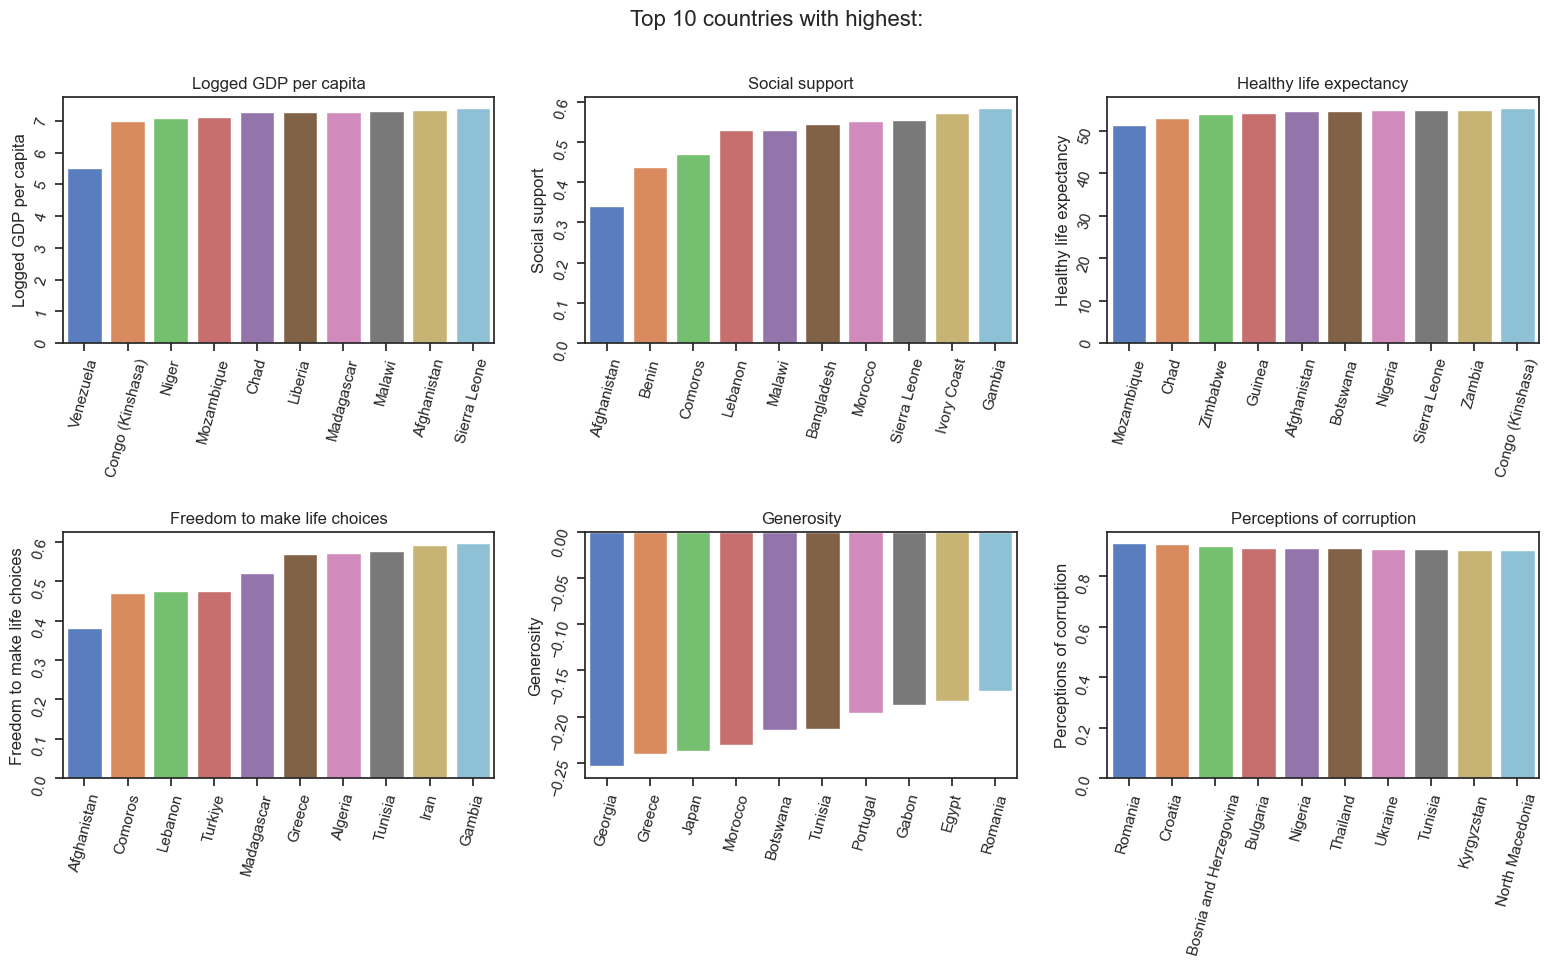

In [14]:
factors = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Top 10 countries with highest:', fontsize=16)

for i, ax in enumerate(fig.axes):
    factor = factors[i]
    ax.set_title(factor)
    ax.tick_params(labelrotation=75)

    negative = (factor == 'Perceptions of corruption')
    highest_factor = df[['Country name', factor]].sort_values(factor, ascending=True ^ negative).head(10)
    sns.barplot(highest_factor, x='Country name', y=factor, ax=ax, palette='muted')
    
    ax.set_xlabel(None)

plt.tight_layout(pad=2)

Afghanistan being the least happy country has also least freedom to make life choices and social support but one of the highest GDP per capita among the least happy countries. Again, we can see some other countries in all these plots therefore, have a look at scatter plots of all the factors against happiness score. 

**Let's plot the relationship between happiness score and all the factors in one figure for ease of us to compare**

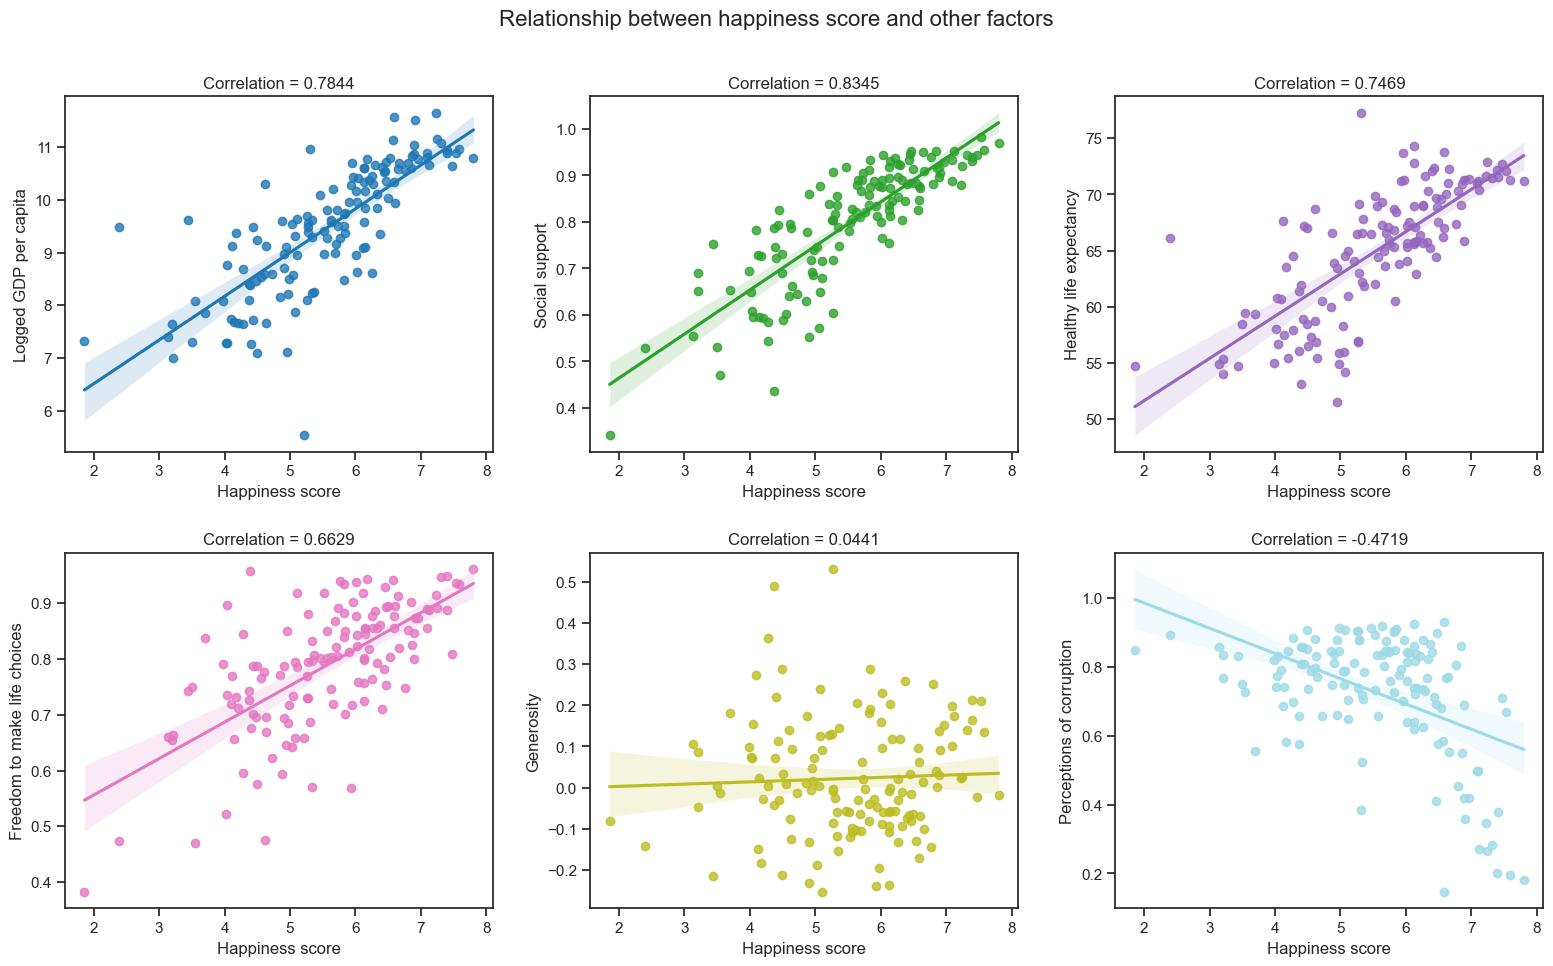

In [15]:
factors = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
tab_20_colors = ["#1f77b4", "#2ca02c", "#9467bd", "#e377c2", "#bcbd22", "#9edae5"]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Relationship between happiness score and other factors', fontsize=16)

for i, ax in enumerate(fig.axes):
    factor = factors[i]

    corr = df['Happiness score'].corr(df[factor])
    ax.set_title(f'Correlation = {corr:.4f}')

    sns.regplot(df, x='Happiness score', y=factor, ax=ax, color=tab_20_colors[i])

plt.tight_layout(pad=2)

- As expected, GDP per capita, Social support and Healthy life expectancy are strong contributors to happiness.
- Freedom to make life choices also has a positive impact but less than the other factors.
- Correlation between happiness score and generosity is only 4.4%. One thing that can be inferred from it is that maybe, the happiest countries have the least proportion of population that's needy and hence they are not necessarily the most generous nations.
- It's clearly visible that countries with highest corruption are least happy. However, the relationship doesn't seem too linear as it can be seen above. Correlation between happiness score and perceptions of corruption is only -47%.

### Macro geo-spatial analysis

We can start by plotting the happiness score of countries on a world map to get a rough overview. 

I used the `plotly` library to create an interactive map, but it does not work nicely with GitHub, so I'll include a screenshot of the map instead.

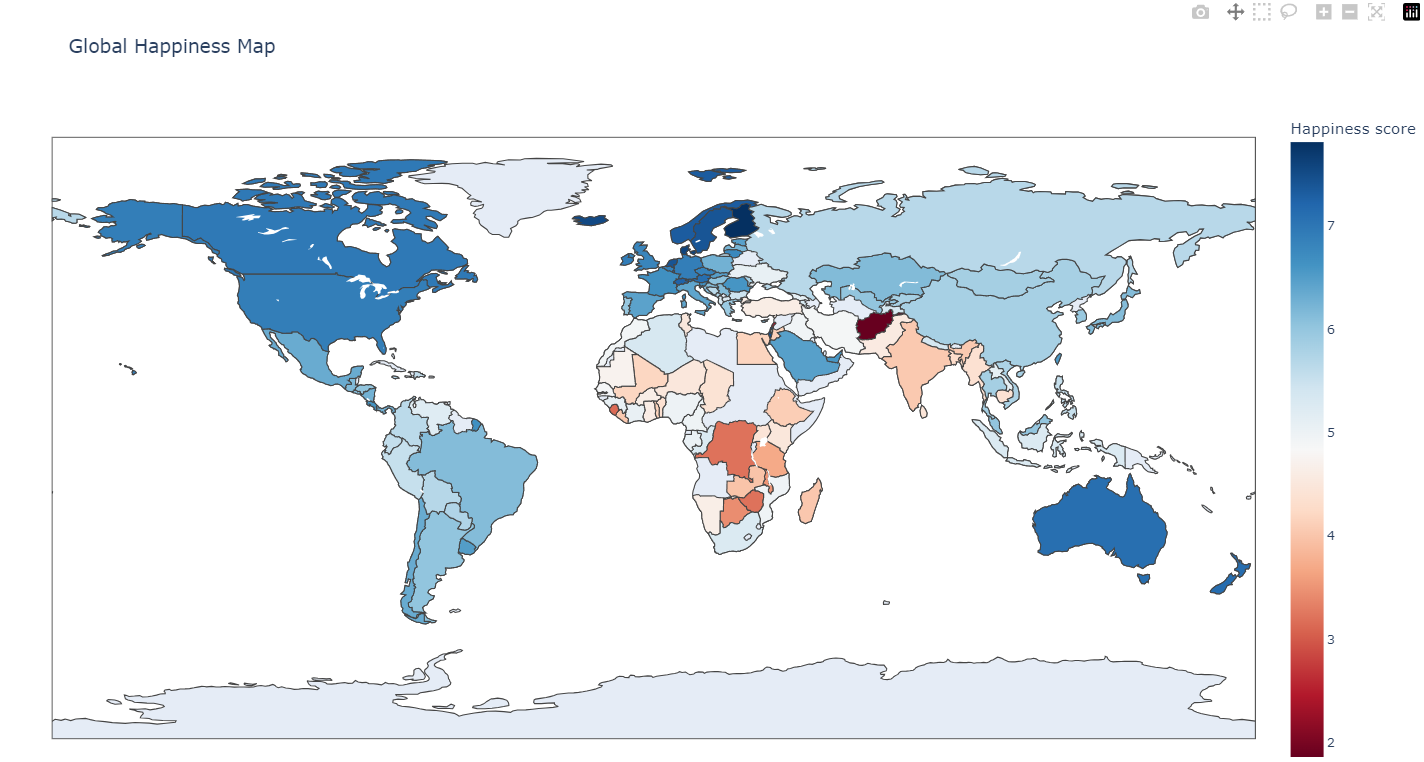

In [27]:
# fig = px.choropleth(
#     df, 
#     locations='iso alpha', 
#     color='Happiness score',
#     hover_name='Country name',
#     title='Global Happiness Map',
#     color_continuous_scale=px.colors.diverging.RdBu)

# fig.update_layout(
#     margin=dict(l=50, r=0, b=0, t=100),
#     width=1300, 
#     height=700)

from IPython.display import Image
image_path = 'images/global_happiness_map.png'
Image(image_path)

There is a clear happiness bias between regions, let's see what exactly is the case.

Text(0, 0.5, '')

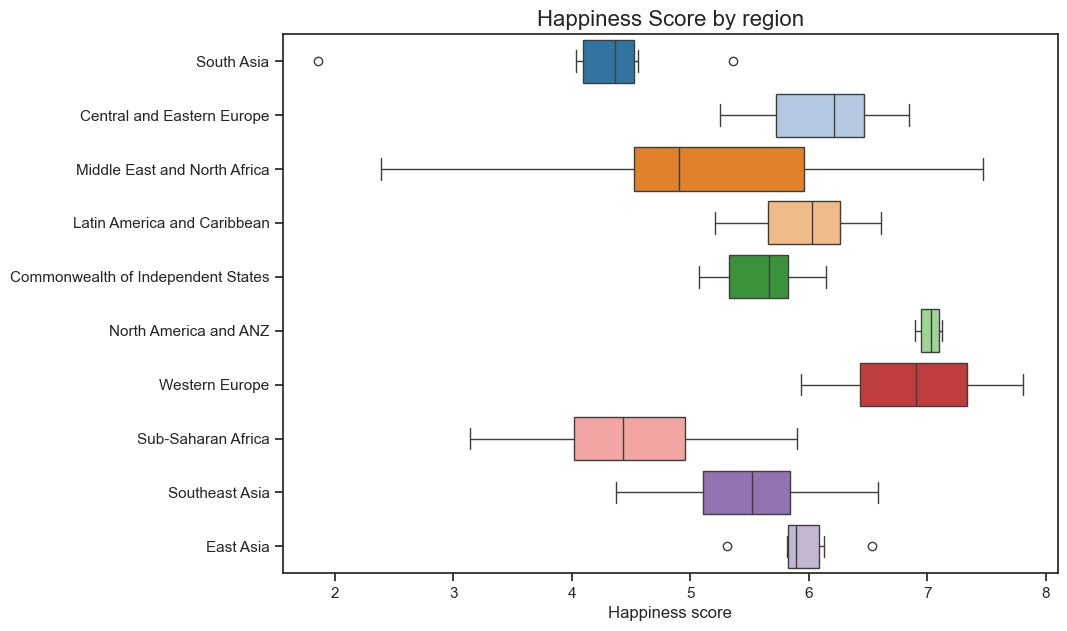

In [17]:
plt.figure(figsize=(10, 7))
plt.title("Happiness Score by region", size=16)
sns.boxplot(df, x='Happiness score', y='Regional indicator', palette='tab20')
plt.ylabel(None)

- The box plot analysis indicates that higher median happiness scores are observed in the Western Europe, North America, and ANZ regions compared to other regions. These are developed regions with more established economies and social systems, which may explain the trend.
- An outlier is observed in the South Asia region, where Afghanistan has a notably lower happiness score. This may be attributed to political instability and hence lower social support and freedom in Afghanistan even though it's GDP per capita is not the worst, as we discussed.

## Conclusion

The comprehensive analysis of happiness scores around the world highlights the importance of economic, social, and health factors in determining societal well-being. The findings suggests that GDP per capita, Social support, Healthy life expectancy, and Freedom to make life choices has the highest impact on happiness levels, while reducing corruption can help improve stability. Hence, top happiest countries can be seen among the top ten countries in all these factors. Generosity seem to be a less important factor as the data speaks for itself. 

By prioritizing happiness as a key goal for individuals, communities, and policymakers, we can work towards creating a world that is more just, equitable, and fulfilling for all.

## Extra: Machine Learning for EDA
We can use baseline ML models to anticipate feature importances. This is a really nice feature of supervised learning beyond predictive analysis.

One of the best models for extracting feature importances is Random Forest as it is very robust yet simple.

**Preparing and training a simple Random Forest**

In [18]:
from sklearn.ensemble import RandomForestRegressor
SEED = 42

In [19]:
# Drop the categorical columns to make it simple
X = df.drop(columns=['Country name', 'iso alpha', 'Regional indicator', 'Happiness score'])
y = df['Happiness score']

# We need to fill in the missing value found earlier here in order for the model to work
X['Healthy life expectancy'].fillna(X['Healthy life expectancy'].median(), inplace=True)

In [20]:
rf = RandomForestRegressor(n_estimators=100, random_state=SEED)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

**The Feature Importances plot**

<BarContainer object of 6 artists>

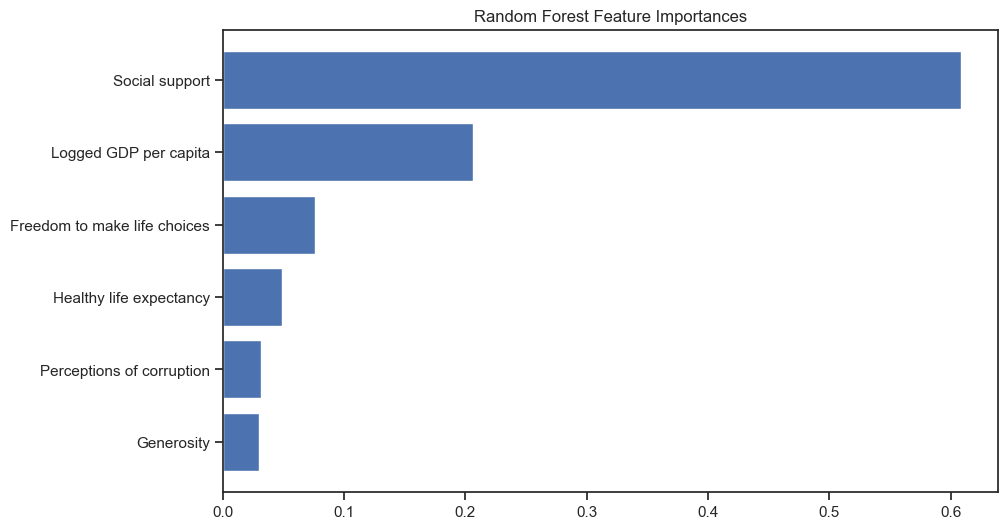

In [21]:
plt.figure(figsize=(10, 6))
plt.title('Random Forest Feature Importances')
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
plt.barh(feat_imp.index, feat_imp.values)

Quick and simple feature importance evaluation confirms our finding earlier, amazing! More could have been done but that would be beyond the scope of this project.